In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
import pandas as pd

from collections import Counter
from nltk.corpus import stopwords

In [2]:
TRAIN_DATA = '/datasets/sts-train.csv'
TEST_DATA = '/datasets/sts-test.csv'
CWD = os.getcwd()

In [3]:
def create_dataframe(data_dir=TRAIN_DATA):
    sentences = {'similarity': [], 'S1': [], 'S2': []}

    for line in open('{0}/{1}'.format(CWD, data_dir), 'r'):
        line = line.split('\t')

        if len(line) == 7:
            sentences['similarity'].append(float(line[-3]))
            sentences['S1'].append(line[-2])
            sentences['S2'].append(line[-1])
        else:
            sentences['similarity'].append(float(line[-5]))
            sentences['S1'].append(line[-4])
            sentences['S2'].append(line[-3])
    
    df = pd.DataFrame.from_dict(sentences)
    print ('num rows in df {0}\n'.format(len(df)))
    print (df.head())
    
    return df

### There are 5,749 training sentence pairs and 1,379 testing sentence pairs
### This comes out to an 80% train / test split

In [4]:
train_df = create_dataframe()
test_df = create_dataframe(TEST_DATA)

num rows in df 5749

   similarity                                             S1  \
0        5.00                         A plane is taking off.   
1        3.80                A man is playing a large flute.   
2        3.80  A man is spreading shreded cheese on a pizza.   
3        2.60                   Three men are playing chess.   
4        4.25                    A man is playing the cello.   

                                                  S2  
0                      An air plane is taking off.\n  
1                        A man is playing a flute.\n  
2  A man is spreading shredded cheese on an uncoo...  
3                       Two men are playing chess.\n  
4               A man seated is playing the cello.\n  
num rows in df 1379

   similarity                                             S1  \
0         2.5                    A girl is styling her hair.   
1         3.6       A group of men play soccer on the beach.   
2         5.0  One woman is measuring another woman

In [5]:
print ('test to train ratio = {0}'.format(len(test_df) / (len(train_df) + len(test_df))))

test to train ratio = 0.19346240179573512


## Evaluate balance of similarity scores

#### The average similarity score in train = 2.7 and test = 2.6
#### Scores are manually assigned to sentence pairs by readers from 0-5 with 5 being most similar
#### This means most sentence pairs are "somewhat alike"
#### Similarity scores in train are about evenly distributed with slightly more 3's and 4's
#### Similarity scores in test are evenly distributed between 0-5

In [6]:
def plot_similarity_score_histogram(scores):
    # the histogram of the data
    n, bins, patches = plt.hist(scores, 15, density=True, facecolor='g', alpha=0.75)


    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.title('Histogram of Similarity Scores')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.xlim(0, max(scores))
    #plt.ylim(0, 0.03)
    plt.grid(True)
    plt.show()


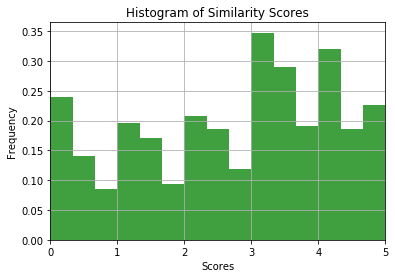

In [7]:
plot_similarity_score_histogram(train_df['similarity'])

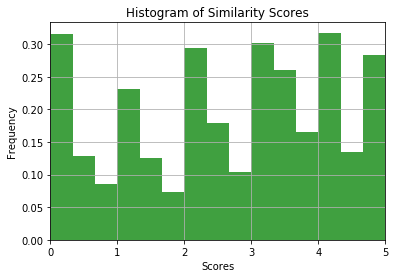

In [8]:
plot_similarity_score_histogram(test_df['similarity'])

In [9]:
train_df['similarity'].describe()

count    5749.000000
mean        2.700999
std         1.464398
min         0.000000
25%         1.500000
50%         3.000000
75%         3.800000
max         5.000000
Name: similarity, dtype: float64

In [10]:
test_df['similarity'].describe()

count    1379.000000
mean        2.607917
std         1.525517
min         0.000000
25%         1.315000
50%         2.800000
75%         3.800000
max         5.000000
Name: similarity, dtype: float64

In [11]:
def show_value_counts(scores):
    scores = [int(score) for score in scores]
    value_counts = dict(Counter(scores))
    
    score_buckets = []
    score_values = []
    
    for i in range(max(scores)):
        print ('Count @ {0} = {1}'.format(i, value_counts[i]))
        score_buckets.append(i)
        score_values.append(value_counts[i])
        
    plt.style.use('ggplot')
    x_pos = [i for i, _ in enumerate(score_buckets)]

    plt.bar(x_pos, score_values, color='green')
    plt.xlabel("Similarity Score")
    plt.ylabel("Score Frequency")
    plt.title("Sentence Pair Similarity Score Distribution")

    plt.xticks(x_pos, score_buckets)

    plt.show()

Count @ 0 = 891
Count @ 1 = 882
Count @ 2 = 982
Count @ 3 = 1588
Count @ 4 = 1140


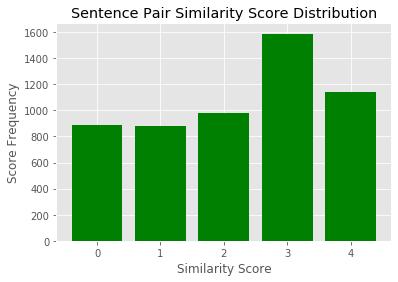

In [12]:
show_value_counts(train_df['similarity'])

Count @ 0 = 243
Count @ 1 = 198
Count @ 2 = 265
Count @ 3 = 335
Count @ 4 = 241


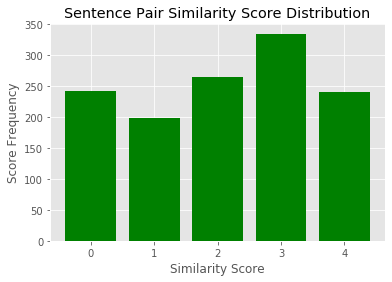

In [13]:
show_value_counts(test_df['similarity'])

## Evaluate the most common words

1. Total words in training is 114,346
2. Unique words are only 18,348
3. 16,346 unique words when accounting for case
4. 16,315 unique words after removing stop words
5. Top 5 words after filtering were man, woman, two, dog, playing

In [14]:
def get_all_words_from_df(df):
    all_words = []
    for sentence in df['S1']:
        for word in sentence.split():
            all_words.append(word)

    for sentence in df['S2']:
        for word in sentence.split():
            all_words.append(word)
            
    print ('total number of words in training set {0}'.format(len(all_words)))
    print ('unique number of words in training set {0}'.format(len(set(all_words))))

    return all_words

In [15]:
all_words = get_all_words_from_df(train_df)

total number of words in training set 114346
unique number of words in training set 18348


In [16]:
def get_word_counts(all_words):
    word_freqs = dict(Counter(all_words))
    sorted_word_freqs = {k: v for k, v in sorted(word_freqs.items(), key=lambda item: -item[1])}
    return sorted_word_freqs

In [17]:
sorted_word_freqs = get_word_counts(all_words)

### Most common words are a, the, is, etc...

In [18]:
def graph_most_common_word_freqs(sorted_word_freqs, n=10):
    top_n_words = {k: sorted_word_freqs[k] for k in list(sorted_word_freqs)[:n]}
    buckets = top_n_words.keys()
    values = top_n_words.values()

    plt.style.use('ggplot')

    plt.bar(buckets, values, color='green')
    plt.xlabel("Word")
    plt.ylabel("Word Frequency")
    plt.title("Top {0} Word Frequency".format(n))

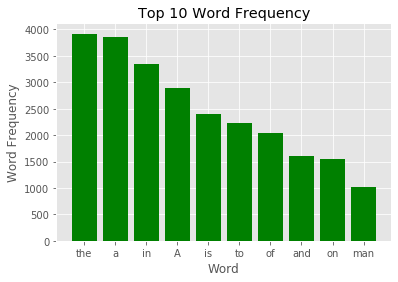

In [19]:
graph_most_common_word_freqs(sorted_word_freqs)

In [20]:
def filter_words(all_words):
    print ('size of all words {0}'.format(len(set(all_words))))
    stop_words = set(stopwords.words('english'))
    
    filtered_words = []
    
    for word in all_words:
        word = word.lower()
        if word not in stop_words:
            filtered_words.append(word)
    
    print ('size after filtering {0}'.format(len(set(filtered_words))))
    print (filtered_words[:10])
    
    return filtered_words

In [21]:
filtered_words = filter_words(all_words)

size of all words 18348
size after filtering 16315
['plane', 'taking', 'off.', 'man', 'playing', 'large', 'flute.', 'man', 'spreading', 'shreded']


### Most common words after filtering are man, woman, two, dog, playing

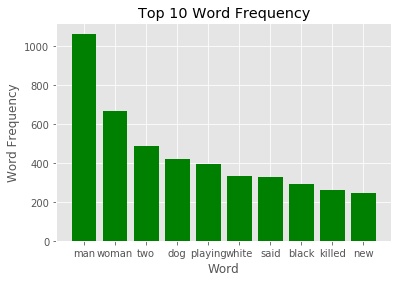

In [22]:
sorted_word_freqs = get_word_counts(filtered_words)
graph_most_common_word_freqs(sorted_word_freqs)

### Evaluate Word and Sentence Length

1. Average word length = 7.075145571559914
2. Min word length = 1
3. Max word length = 48
4. 90th percentile word length 10.0


1. Average sentence length = 59.31973478220831
2. Min sentence length = 16
3. Max sentence length = 368
4. 90th percentile sentence length 111.0

In [27]:
def graph_word_lengths(sorted_word_lens, metric, n=10):
    top_n_words = {k: sorted_word_lens[k] for k in list(sorted_word_lens)[:10]}
    buckets = [k[:4] for k in top_n_words.keys()]
    values = top_n_words.values()

    plt.style.use('ggplot')

    plt.bar(buckets, values, color='green')
    plt.xlabel("{0}".format(metric))
    plt.ylabel("{0} Length".format(metric))
    plt.title("Top {0} Longest {1}s".format(n, metric))

In [24]:
def analyze_text_length(text, metric):
    print('\nAverage {0} length = {1}'.format(metric, np.mean(list(text.values()))))
    print('Min {0} length = {1}'.format(metric, min(list(text.values()))))
    print('Max {0} length = {1}'.format(metric, max(list(text.values()))))
    print ('90th percentile {0} length {1}'.format(metric, np.percentile(list(text.values()), 90)))

    sorted_word_lens = {k: v for k, v in sorted(text.items(), key=lambda item: -item[1])}
    graph_word_lengths(sorted_word_lens, metric)

total number of words in training set 114346
unique number of words in training set 18348
size of all words 18348
size after filtering 16315
['plane', 'taking', 'off.', 'man', 'playing', 'large', 'flute.', 'man', 'spreading', 'shreded']

Average word length = 7.075145571559914
Min word length = 1
Max word length = 48
90th percentile word length 10.0


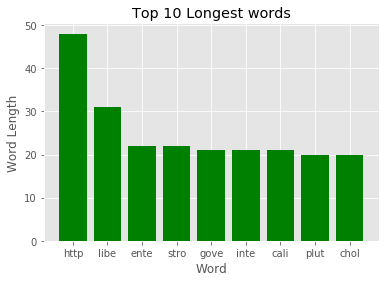

In [25]:
all_words = get_all_words_from_df(train_df)
filtered_words = set(filter_words(all_words))

word_lengths = {}
for word in filtered_words:
    word_lengths[word] = len(word)

analyze_text_length(word_lengths, 'word')


Average sentence length = 10.105074132056359
Min sentence length = 2
Max sentence length = 56
90th percentile sentence length 18.0


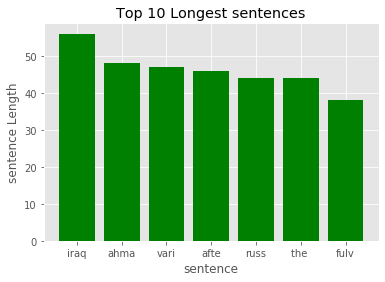

In [28]:
sent_lengths = {}
sentences = list(train_df['S1']) + list(train_df['S2'])
for sentence in sentences:
    sent_lengths[sentence] = len(sentence.split())

analyze_text_length(sent_lengths, 'sentence')